In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
hyst = pd.read_csv("C:\\Users\\alindqu1\\Desktop\\hyst\\scd1h.csv") #input file name here
bkf = pd.read_csv("C:\\Users\\alindqu1\\Desktop\\bkf1.csv") #input file name here
hyst.head(4)

,field,moment
0,1.000028,0.000053
1,0.980100,0.000053
2,0.960586,0.000053
3,0.941451,0.000052


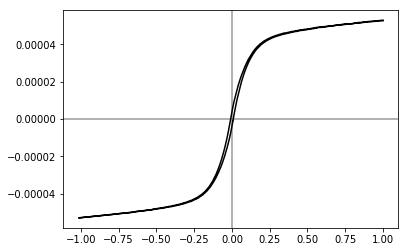

In [2]:
plt.axvline(x=0,color='#999999')
plt.axhline(y=0,color='#999999')
plt.plot(hyst.field,hyst.moment,color='#000000')

In [3]:
upper = 0.9*(hyst.moment[0]) #determine which values to use to fit uppper line
n = 0
while hyst.moment[n] > upper: #determine which lower bound of data set for fitting line
    n = n + 1
limup = n
#print(limup, hyst.moment[limup]) #uncomment to print values

hystmatrix = np.matrix(hyst) #make data a matrix for fitting a linear regression

X, Y = hystmatrix[0:limup,0], hystmatrix[0:limup,1]
fitupper = LinearRegression().fit(X,Y)
m_upper = fitupper.coef_[0]
b_upper = fitupper.intercept_
print('upper fit: y =', m_upper, 'x +', b_upper)

upper fit: y = [9.5958219e-06] x + [4.35040964e-05]


In [19]:
min = int(len(hyst)/2)
#print(min)

lower = 0.9*hyst.moment[min] #determine value for bounds on lower data to fit

n = 0 
while hyst.moment[n] > lower: #find which two indices include needed data
    n = n + 1
bound1 = n

m = min+10
while hyst.moment[m] < lower:
    m = m + 1
bound2 = m

X, Y = hystmatrix[bound1:bound2,0], hystmatrix[bound1:bound2,1]
fitlower = LinearRegression().fit(X,Y)
m_lower = fitlower.coef_[0]
b_lower = fitlower.intercept_
print('lower fit: y =', m_lower, 'x +', b_lower)

lower fit: y = [9.4562978e-06] x + [-4.34356034e-05]


In [20]:
m_upper = float(m_upper) #make slopes and intercepts floats
m_lower = float(m_lower)
b_upper = float(b_upper)
b_lower = float(b_lower)
m_new = (m_upper+m_lower)/2 #mean to find slope for whole data set
b_new = (b_upper + b_lower)*(0.5) #find value to adjust vertical shift
print('slope for correction =', m_new,', vertical adjust =', b_new)

slope for correction = 9.526059853294314e-06 , vertical adjust = 3.424649832236415e-08


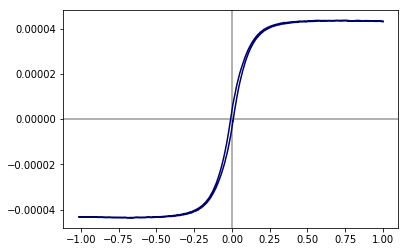

In [30]:
hyst.moment2 = hyst.moment-(m_new*hyst.field)-b_new
plt.axvline(x=0,color='#999999')
plt.axhline(y=0,color='#999999')
plt.plot(hyst.field,hyst.moment2,color='#000066')


#hystmatrix = np.matrix(hyst) #make data a matrix for fitting a linear regression
#pd.DataFrame({'field':[hyst.field[0]], 'moment':[hyst.moment[0]]})

In [22]:
#find un-corrected Hc values by fitting slope to line defined by points above and below the x-intercept
for i in range(0,len(hyst)-1):
    if hyst.moment[i] > 0 and hyst.moment[i+1] < 0:
        hc1 = hyst.field[i] - (((hyst.field[i+1]-hyst.field[i])/(hyst.moment[i+1]-hyst.moment[i]))*hyst.moment[i])
    elif hyst.moment[i] < 0 and hyst.moment[i+1] > 0:
        hc2 = hyst.field[i] - (((hyst.field[i+1]-hyst.field[i])/(hyst.moment[i+1]-hyst.moment[i]))*hyst.moment[i])
    else:
        i = i+1

hc = abs(hc1-(hc1+hc2)*0.5) #find coercivity of sample
print(hc1,hc2)
#new x values should = x_original-0.5*(hc1+hc2)
print('sample coercivity =', hc)

#still need to correct the x values

-0.008495988803004952 0.008757441791809682
sample coercivity = 0.008626715297407318


In [1]:
hyst.field2 = hyst.field - (0.5)*(hc1+hc2)
plt.axvline(x=0,color='#999999')
plt.axhline(y=0,color='#999999')
plt.plot(hyst.field,(hyst.moment),color='#AFEEEE')
plt.plot(hyst.field2,(hyst.moment2),color='#000000')
plt.xlabel('field (T)')
plt.ylabel('magnetic moment (Am2)')

NameError: name 'hyst' is not defined

In [84]:
#adj=pd.merge(hyst.field2, hyst.moment2, on='')
#print(adj)
#still would like to combine into single output

In [31]:
for i in range(0,len(hyst)-1): #find remanence (Mr)
    if hyst.field[i] > 0 and hyst.field[i+1] < 0:
        mr = hyst.moment[i]-(((hyst.moment[i+1]-hyst.moment[i])/(hyst.field[i+1]-hyst.field[i]))*hyst.field[i])
    else:
        i = i+1

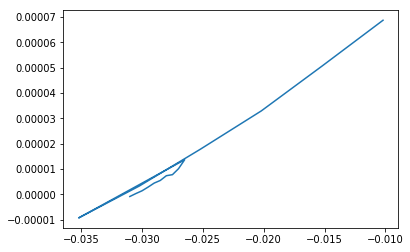

In [32]:
plt.plot(bkf.backfield,bkf.backrem)

for i in range(0,len(bkf)-1):
    if bkf.backrem[i] > 0 and bkf.backrem[i+1] < 0:
        hcr = bkf.backfield[i] - ((bkf.backfield[i+1]-bkf.backfield[i])/(bkf.backrem[i+1]-bkf.backrem[i])*bkf.backrem[i])
        i = i + 1
    else:
        i = i + 1

hcr = hcr*(-1)

In [33]:
ms = hyst.moment[0]
print('Ms =',ms,'Am2')
print('Mr =', mr, 'Am2')
print('Hc =', hc, 'T')
print('Hcr =', hcr, 'T')

Ms = 5.2876809999999996e-05 Am2
Mr = 3.830491544185738e-06 Am2
Hc = 0.008626715297407318 T
Hcr = 0.03060408022418471 T


Text(0.5,0,'Hcr/Hc')

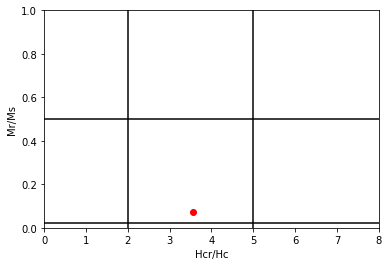

In [35]:
plt.plot((hcr/hc),(mr/ms), 'or')
plt.axvline(x=2,color='#000000')
plt.axvline(x=5,color='#000000')
plt.axhline(y=0.02,color='#000000')
plt.axhline(y=0.5,color='#000000')
plt.ylim([0,1])
plt.xlim([0,8])
plt.ylabel('Mr/Ms')
plt.xlabel('Hcr/Hc')
